In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [37]:
#Load the dataset
df=pd.read_csv('D:\DA_proj\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.shape

(7043, 21)

In [39]:
#preprocess the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
label_encoder=LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    if column!='customerID':
        df[column]=label_encoder.fit_transform(df[column])

In [41]:
sc=StandardScaler()
numerical_col=['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_col]=sc.fit_transform(df[numerical_col])

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.398608,0
1,5575-GNVDE,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.948762,0
2,3668-QPYBK,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-1.641883,1
3,7795-CFOCW,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.983710,0
4,9237-HQITU,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-1.235224,1


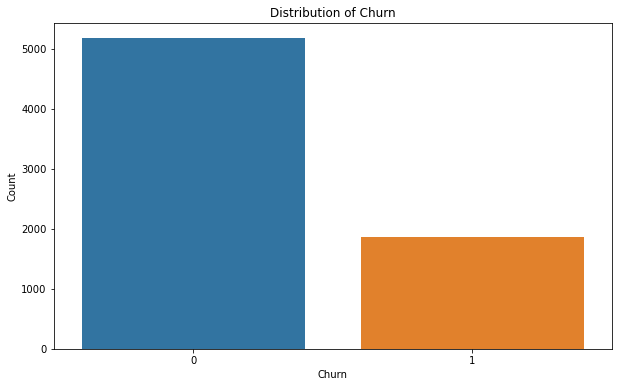

In [43]:
#Exploratory data analysis(EDA)
plt.figure(figsize=(10,6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [44]:
x=df.drop(['Churn', 'customerID'], axis=1)
y=df['Churn']

[]

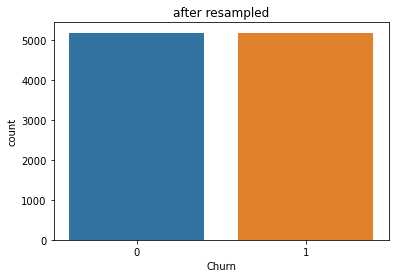

In [45]:
#OverSampling
over=SMOTE()
x_resampled, y_resampled=over.fit_resample(x,y)
sns.countplot(x=y_resampled)
plt.title('after resampled')
plt.plot()

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [47]:
#train the randomforest model
rd_model=RandomForestClassifier(random_state=42)
rd_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred=rd_model.predict(x_test)

In [49]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



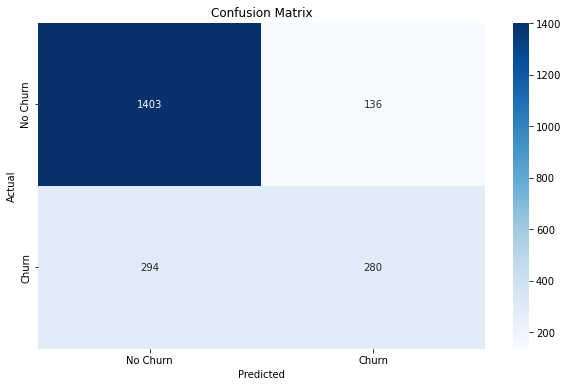

In [50]:
#confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

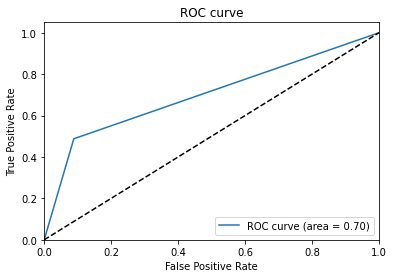

In [51]:
#ROC curve
y_pred_proba=rd_model.predict(x_test)
fpr, tpr, _=roc_curve(y_test, y_pred_proba)
roc_auc=roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
#train the Adaboost model
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred_ad = model.predict(x_test)

In [53]:
print('classification report')
print(classification_report(y_pred_ad, y_test))

classification report
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1659
           1       0.53      0.67      0.59       454

    accuracy                           0.80      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.82      0.80      0.81      2113



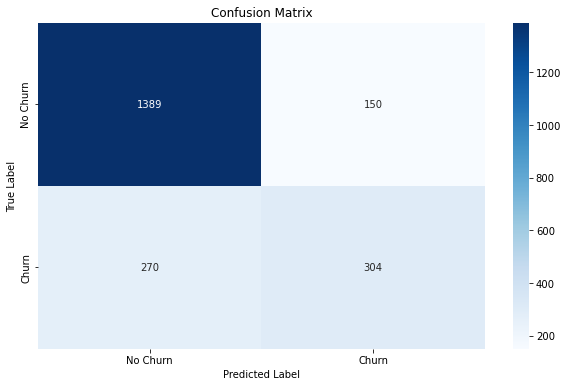

In [55]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_ad)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

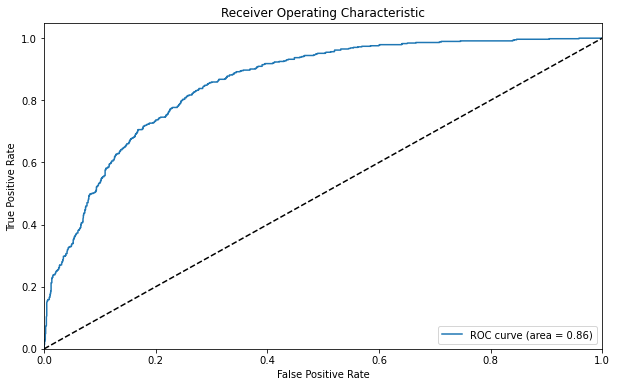

In [56]:
#Adaboost ROC curve
y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()